<a href="https://colab.research.google.com/github/pkRaksha/Regression/blob/main/Raksha_Retail_sales_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    -Regression
##### **Contribution**    - Individual

# **Project Summary -**

This dataset is a live dataset of Rossmann Stores. On analsysing this problem we observed that our goal is to predict the sales figures of Rossmann store. In this project we work Analysed the Dataset by using Exploratory Data Analysis , we used Exponential Moving Averages to analyse Trends and Seasonality in Rossmann dataset. we used the following for prediction analysis,

A. Linear Regression Analysis

B. Random Forest regressor


.

# **GitHub Link -**

https://github.com/pkRaksha/Regression

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
sales_df=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_df=pd.read_csv('/content/drive/MyDrive/store (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head()

In [ ]:
# Dataset First Look
store_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(sales_df.shape)
print(store_df.shape)

### Dataset Information

In [ ]:
# Dataset Info
sales_df.info()

In [ ]:
sales_df['StateHoliday'].value_counts()

In [ ]:
# Dataset Info
store_df.info()


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(sales_df)-len(sales_df.drop_duplicates())
len(store_df)-len(store_df.drop_duplicates())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
sales_df.isnull().sum().sum()

In [ ]:
store_df.isnull().sum().sum()

In [ ]:
# Visualizing the missing values
missing_values=store_df.isnull().sum()
missing_values=missing_values[missing_values>0]
label=missing_values.index
count=missing_values.values
colors = sns.color_palette('pastel')
plt.pie(count, labels=label,colors = colors, autopct='%.3f%%')
plt.show()

In [ ]:
# replacing promo2 values with zero wherever promo2 is not applied
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#Replacing the distance with median since its skewed to the right showung the presence of outliers
x=store_df['CompetitionDistance']
plt.hist(x)
plt.show()

store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(),inplace=True)
     

In [ ]:
#Replacing the month and year with mode value since they have few unique values 
x=store_df['CompetitionOpenSinceMonth']
plt.hist(x)
plt.show()

store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
     

In [ ]:
x=store_df['CompetitionOpenSinceYear']
plt.hist(x)
plt.show()

store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)
     

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
sales_df.columns

In [ ]:
store_df.columns

In [ ]:
# Dataset Describe
sales_df.describe()

In [ ]:
store_df.describe()

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
store_df.nunique()

In [ ]:
sales_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
sales_df['sale_year'] = pd.DatetimeIndex(sales_df['Date']).year
sales_df['sale_month'] = pd.DatetimeIndex(sales_df['Date']).month
#change into int type
sales_df['StateHoliday'].replace({'0':0,'a':1,'b':1,'c':1}, inplace=True)

In [ ]:
#Combining the two datasets
retail_df=sales_df.merge(store_df, on='Store',how='left')
retail_df.drop(columns="Store",inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code


plt.figure(figsize=(10,6))
  
plt.subplot(1,2,1)
Store_distribution=retail_df.groupby('StoreType')['StoreType'].count().reset_index(name='No_of_Stores')
sns.barplot(x = 'StoreType', y = 'No_of_Stores', data = Store_distribution)
plt.title("Distribution of StoreType")

plt.subplot(1,2,2)
data=retail_df[["StoreType","Sales"]].sort_values(by="StoreType")
sns.boxplot(x="StoreType", y="Sales", data=data)


plt.show()


plt.figure(figsize=(10,6))
  
plt.subplot(1,2,1)
Assortment_distribution=retail_df.groupby('Assortment')['Assortment'].count().reset_index(name='No_of_Assortment')
sns.barplot(x = 'Assortment', y = 'No_of_Assortment', data = Assortment_distribution)
plt.title("Distribution of AssortmentType")

plt.subplot(1,2,2)
data=retail_df[["Assortment","Sales"]].sort_values(by="Assortment")
sns.boxplot(x="Assortment", y="Sales", data=data)


plt.show()


plt.figure(figsize=(10,6))
  
plt.subplot(1,2,1)
Assortment_distribution=retail_df.groupby('DayOfWeek')['DayOfWeek'].count().reset_index(name='No_of_DayOfWeek')
sns.barplot(x = 'DayOfWeek', y = 'No_of_DayOfWeek', data = Assortment_distribution)
plt.title("Distribution of DayOfWeek")

plt.subplot(1,2,2)
data=retail_df[["DayOfWeek","Sales"]].sort_values(by="DayOfWeek")
sns.boxplot(x="DayOfWeek", y="Sales", data=data)


plt.show()




##### 1. Why did you pick the specific chart?

Bar charts are used to display the categorical varibales distribution.
BoxPlots are used to show data from a five-number summary including one of the measures of central tendency.Inorder to check the Sales quantity against the categorical variable its chosen.


##### 2. What is/are the insight(s) found from the chart?

-The graph shows that StoreType A is has high number of stores and Bis the lowest.But Store B has highest sales average sales.
-The assortment type shows that A has highest distribution .But in assortment also type B gives more average sales.
-The revenue generating store type are B and assortment is B. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

-The sales during Monday is very High followed by other days since the store on Sunday is closed.

#### Chart - 2

In [ ]:
#Chart 2
sns.countplot(x=retail_df["Open"], hue=retail_df["DayOfWeek"])
plt.title("Open VS DayOfweek")



##### 1. Why did you pick the specific chart?

Bar chart is used to visulaize quantitative data 

##### 2. What is/are the insight(s) found from the chart?

The store is open in all days of the week except sunday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No , it does not lead to negative growth

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

retail_df['Period']=retail_df['sale_month'].astype('str')+"-"+retail_df['sale_year'].astype('str')
res=retail_df.groupby(['Period','Promo'])['Sales'].mean().reset_index(name='average_sales')
fig, ax = plt.subplots(figsize=(20, 5))

chart2=sns.lineplot(data=res,x='Period',y='average_sales',ax=ax,hue='Promo',style='Promo', markers=True, dashes=False)
label=res['Period'].unique()
chart2.set_xticklabels(labels=label,rotation=30)
plt.title("Effect of promo on Sales Rates over a the years 2013 - 2015 ")
plt.show()



##### 1. Why did you pick the specific chart?

Line chart is used to visualize any sales trend over a period of time.


##### 2. What is/are the insight(s) found from the chart?

Promo affects the sales . The stores with promo has perfomed very well throught the year when compared to without promo. The sales has doubled .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence Promotion is very important aspect affecting sales quantity.The revenue of the store increases when there is promotion regardless of the months .

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
res=retail_df.groupby(['sale_year','sale_month'])['Sales'].mean().reset_index(name='average_sales')
fig, ax = plt.subplots(figsize=(20, 5))
chart=sns.lineplot(data=res,x='sale_month',y='average_sales',ax=ax,hue="sale_year",style="sale_year" ,markers=True, dashes=False)
plt.title("Overall Sales over a period of time 2013 -2015")
plt.show()


##### 1. Why did you pick the specific chart?

The line chart shows the sales trend for each year .


##### 2. What is/are the insight(s) found from the chart?

On all the years there is a dip in average sales during the first quarter .The sales rapidly increase during the last quarter for the year 2014 and 2013. In the year 2015 the sales trend till the month of June is only present .


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The graph shows that irrespective of the promo and Holidays the last quarter will have spike in sales .
The months of October ,November and December are most profitable.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
res=retail_df.groupby(['sale_year','sale_month','SchoolHoliday'])['Sales'].sum().reset_index(name='Average sales').sort_values(by='sale_month')
pivot=res.pivot_table(index=['sale_year','sale_month'],columns=['SchoolHoliday'],values=['Average sales'])

ax=pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(15,6))
plt.legend(title='Sales VS Holiday', loc='upper left', labels=['No_Holiday', 'Holiday'])
plt.show(ax)



##### 1. Why did you pick the specific chart?

Bar charts are used to display the categorical varibles distribution.


##### 2. What is/are the insight(s) found from the chart?

The bar graph shows that the sales is not affected by schoolHoliday.Infact there is more sales when there is no holidays.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence promo could be intitated during the holdiays to inititae more sales.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Date','DayOfWeek','sale_year','sale_month','CompetitionDistance','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear']
corr_df = retail_df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'0':0,'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
plt.figure(figsize=(10,7))
# sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)
corr_df.columns

##### 1. Why did you pick the specific chart?

The correlation heatmap is used to visulaize the correlation of each variable with the dependant variable sales


##### 2. What is/are the insight(s) found from the chart?

The chart says that the Customers,Promo,Open stores are highly correlated with the sales quantity.
The state and school holidays are negatively correlated to sales. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hence holidays dont affect sales . The quantity of sale is highly seasonal.
The first promotion gives a boost to sales . The second consecutive promotions do not affect sales much .

#### Chart - 7

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

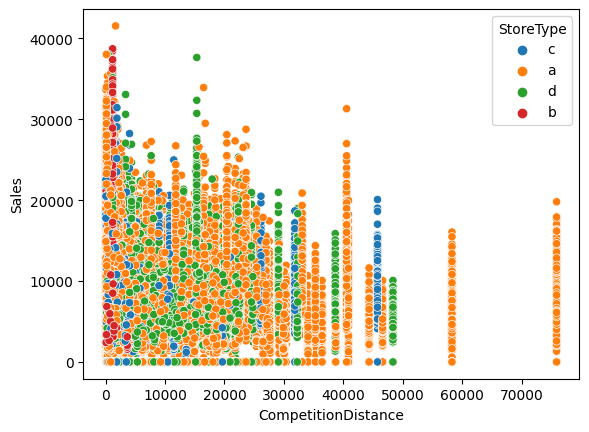

In [35]:
# Chart - 7 visualization code

#scatterplot of Competition Distance and Sales

sns.scatterplot(x=retail_df['CompetitionDistance'], y=retail_df['Sales'],hue=retail_df['StoreType'])


##### 1. Why did you pick the specific chart?

Scatter plot helps to visualize the distribution of numerical data 


##### 2. What is/are the insight(s) found from the chart?

The competition stores within 10kms makes more sales.The storetype a has many competitors hence the average quantity of sales is affected . As explained in the boxplot the store type B and assorment have higher sales .
The closely nit store gives more quantity odf sales.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Leads to positve growth only

#### Chart - 8

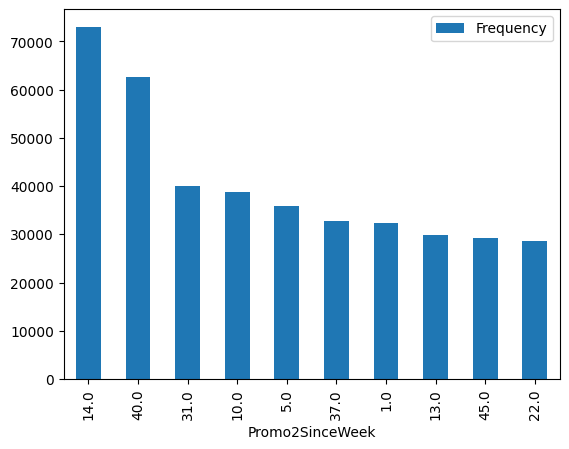

In [36]:
# Chart - 8 visualization code
result=retail_df.groupby('Promo2SinceWeek')['Promo2SinceWeek'].count().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False)
ax=result[1:11].plot.bar(x='Promo2SinceWeek')
plt.show(ax)


##### 1. Why did you pick the specific chart?





Bar charts are used to display the categorical varibales distribution.


##### 2. What is/are the insight(s) found from the chart?

The second promo frequently occurs  during the months of April,November,October,July,March
This will help to increase the sales during the times when the sales is low thats the mid of the year . Usually there is high sales during end of the year due to holidays .
The line charts 2 also conveys the fact that the peak in sales is during the months of October,November,December and March and July.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bo insights for negative growth

#### Chart - 9

<Axes: xlabel='Customers', ylabel='Sales'>

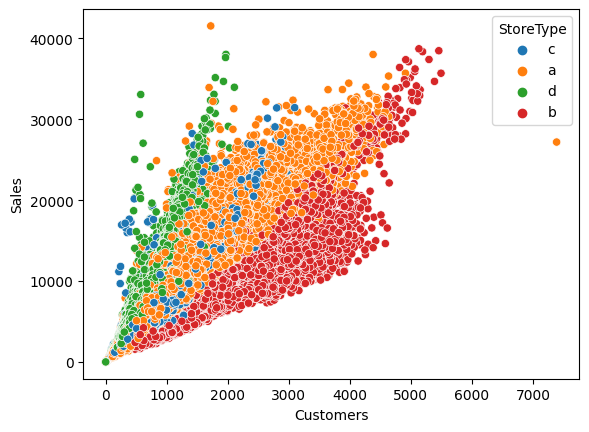

In [37]:
# Chart - 9 visualization code

sns.scatterplot(x=retail_df['Customers'], y=retail_df['Sales'],hue=retail_df['StoreType'])

##### 1. Why did you pick the specific chart?


Scatter plot helps to visualize the distribution of numerical data 
.

##### 2. What is/are the insight(s) found from the chart?

The number of customers is positively correlated with Sales .There are High number of customers visiting the Store type A and B

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if Promo leads to a change in the average of sales.

**Null Hypothesis:** The average sales is equal between the two groups

**Alternate Hypothesis**:The average sales is not equal between the two groups

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
no_promo=retail_df.loc[retail_df['Promo']==0]
no_promo=no_promo.sample(n=29)
with_promo=retail_df.loc[retail_df['Promo']==1]
with_promo=with_promo.sample(n=29)

group1=no_promo['Sales']
group2=with_promo['Sales']

import scipy.stats as stats

#perform the Mann-Whitney U test
stats.mannwhitneyu(group1, group2, alternative='two-sided')

MannwhitneyuResult(statistic=191.0, pvalue=0.00035993880030178515)

##### Which statistical test have you done to obtain P-Value?





Mann-Whitney U Test:

The p value is less than 0.05 . Hence we reject the null hypothesis. The promo has effect on sales average.

##### Why did you choose the specific statistical test?

A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed and the sample sizes are small (n <30).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if Customers and sales have positive correlation

**Null Hypothesis:** The customers have no correlation with sales

**Alternate Hypothesis:**The customers have correlation with sales

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
spearmanr(retail_df['Customers'], retail_df['Sales'])



SignificanceResult(statistic=0.9033527549358042, pvalue=0.0)

##### Which statistical test have you done to obtain P-Value?

Spearman Rank Correlation, which is used to measure the correlation between two ranked variables.

The correlation is positive and the p value supports it by rejecting the null hypothesis since it is less than 0.05

##### Why did you choose the specific statistical test?

Since sales and customers are not normally distributed the non parametric correlation is chosen

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if StoreType,Assortment and pairs odf StoreType and Assortment hav impact on sales.

**Null Hypothesis:** The  sales is not affected by Storetype.
The sales is not affected by Assortment

**Alternate Hypothesis:**The  sales is affected by Storetype.
The sales is affected by Assortment 

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Sales ~ C(StoreType) + C(Assortment) + C(StoreType):C(Assortment)', data=retail_df).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(StoreType),8.877651e+10,3.0,2065.756237,0.0
C(Assortment),7.103380e+10,2.0,2479.347132,0.0
C(StoreType):C(Assortment),1.350265e+11,6.0,1570.977652,0.0
Residual,1.457149e+13,1017200.0,NaN,NaN


##### Which statistical test have you done to obtain P-Value?



Two -Way Anova Test:
The p value for StoreType ,Assortment and both taken into account as pairs have effect on sales . The p Value is less than 0.05 Hence the null hypothesis is rejected 

##### Why did you choose the specific statistical test?

A two-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two factors.

The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

## ***6. Feature Engineering & Data Pre-processing***

### Handling Ouliers 

In [41]:
def plotvariable(df,variable):
  plt.figure(figsize=(8,4))
  
  plt.subplot(1,2,1)
  plt.hist(df[variable])
  plt.title("Distribution of {} ".format(variable))

  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.title("Distribution of {} ".format(variable))
  
  
  plt.show()

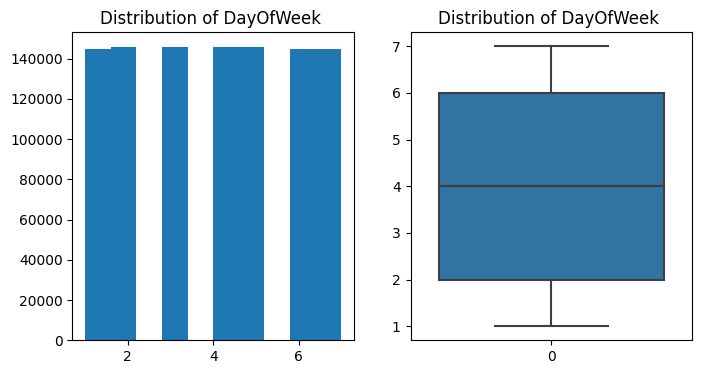

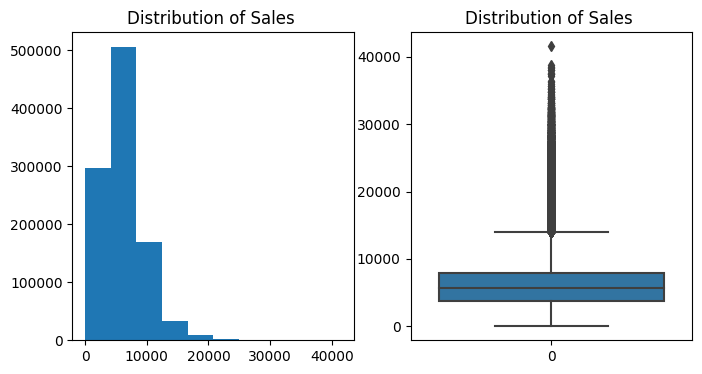

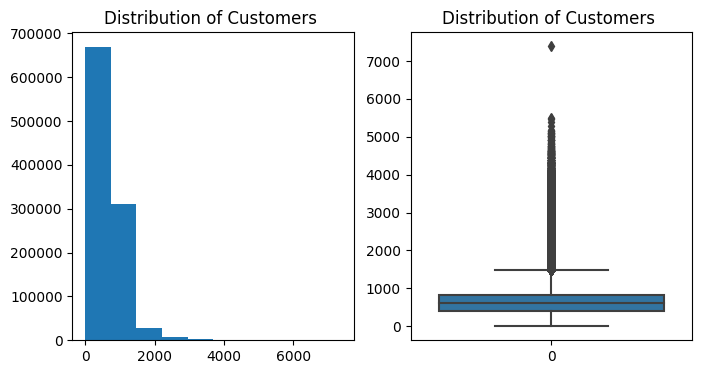

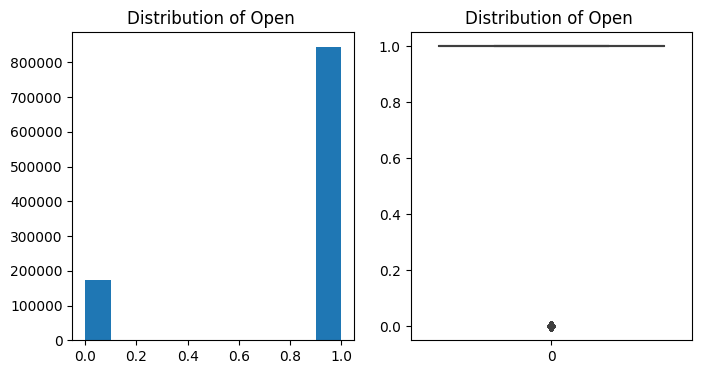

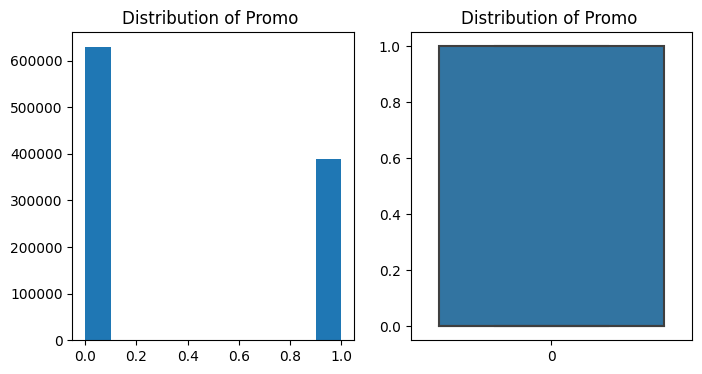

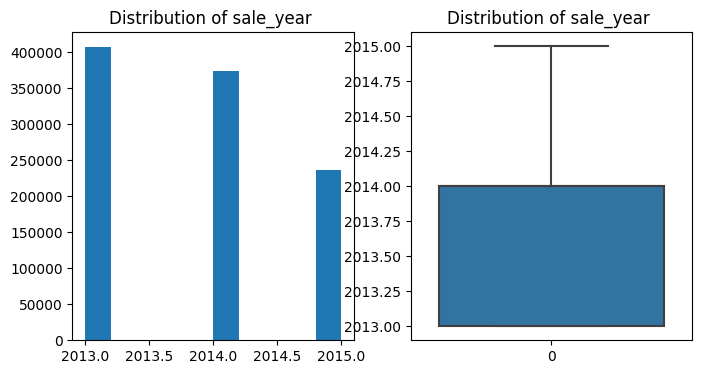

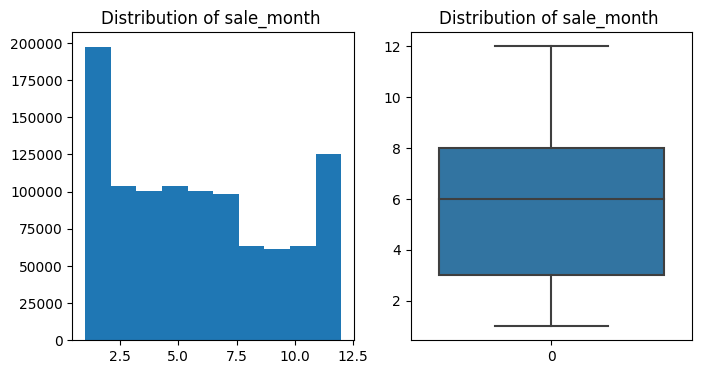

In [42]:
sales_data=sales_df.drop(columns=["Store","Date","StateHoliday","SchoolHoliday"]).columns
store_data=store_df.drop(columns=["Store"]).columns
type(sales_data.tolist())
for variable in sales_data.tolist():
  plotvariable(sales_df,variable)

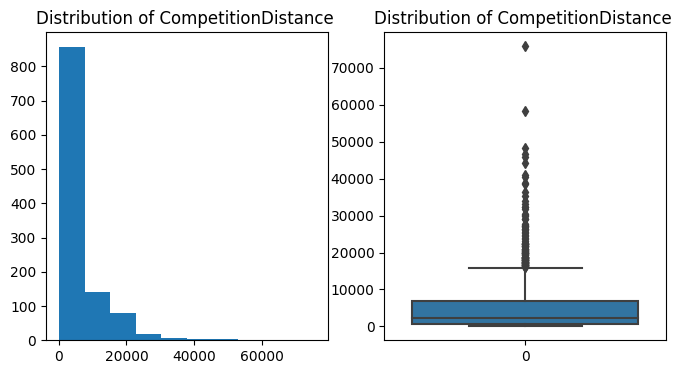

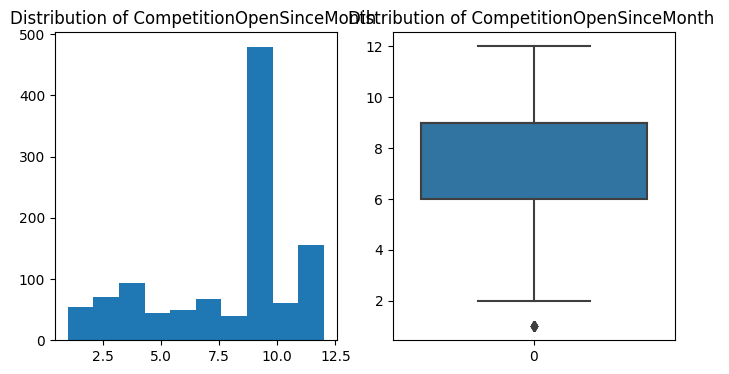

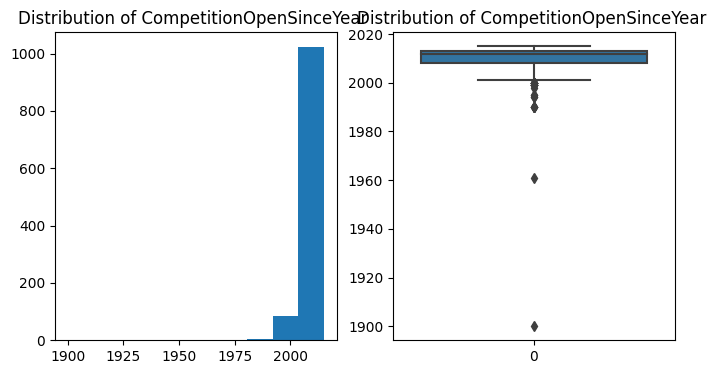

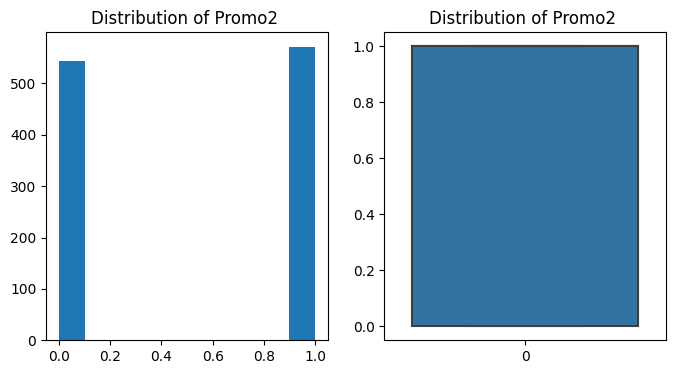

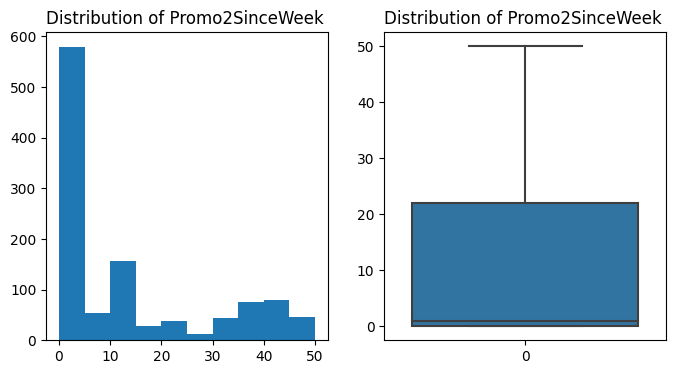

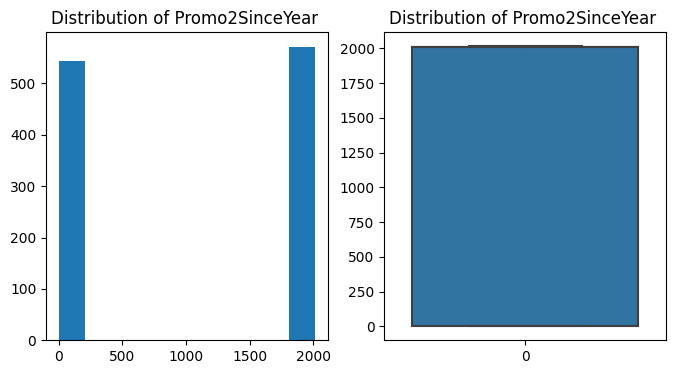

In [43]:
store_data=store_df.drop(columns=["Store","StoreType","Assortment","PromoInterval"]).columns
type(store_data.tolist())
for variable in store_data.tolist():
  plotvariable(store_df,variable)

**The columns that have ouliers are:**




1.   Sales
2.Customers
3. CompetitionDistance
4. CompetitionOpenSinceYear


In [44]:
# Dependent variable 'Sales'

retail_df.drop(retail_df[retail_df['Sales'] == float("-inf")].index,inplace=True)

In [45]:
# retail_df['Sales']=np.log(retail_df['Sales']) 

(array([2.96673e+05, 5.05472e+05, 1.69792e+05, 3.32340e+04, 8.90100e+03,
        2.36200e+03, 5.65000e+02, 1.74000e+02, 2.80000e+01, 8.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

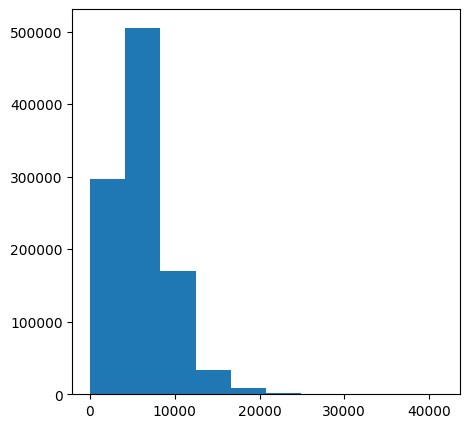

In [46]:
plt.figure(figsize=(5,5))
plt.hist(x=retail_df['Sales'])

In [47]:
# Handling Outliers & Outlier treatments
def boundaries(df,variable):
  Q1=df[variable].quantile(.25)
  Q3=df[variable].quantile(.75)
  IQR=Q3-Q1
  lower_boundary=Q1-1.5*IQR
  upper_boundary=Q3+1.5*IQR

  return lower_boundary,upper_boundary

for variable in ["Sales","Customers","CompetitionDistance","CompetitionOpenSinceYear"]:
  lower,upper=boundaries(retail_df,variable)
  print("The lower = {} and upper boundary ={} of the variable {}".format(lower,upper,variable))


The lower = -2466.5 and upper boundary =14049.5 of the variable Sales
The lower = -243.0 and upper boundary =1485.0 of the variable Customers
The lower = -8545.0 and upper boundary =16135.0 of the variable CompetitionDistance
The lower = 2000.5 and upper boundary =2020.5 of the variable CompetitionOpenSinceYear


In [48]:
outlier_sales=retail_df[(retail_df['Sales']>14049.5) | (retail_df['Sales']<-2466.5)]

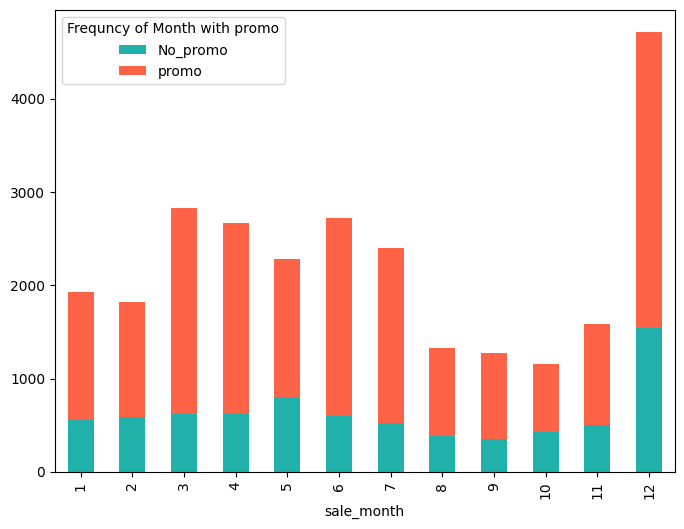

In [49]:
visual=outlier_sales.groupby(['sale_month','Promo'])['sale_month'].count().reset_index(name='Frequency').sort_values(by='sale_month')
pivot=visual.pivot_table(index=['sale_month'],columns=['Promo'],values=['Frequency'])

ax=pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(8,6))
plt.legend(title='Frequncy of Month with promo', loc='upper left', labels=['No_promo', 'promo'])
plt.show(ax)

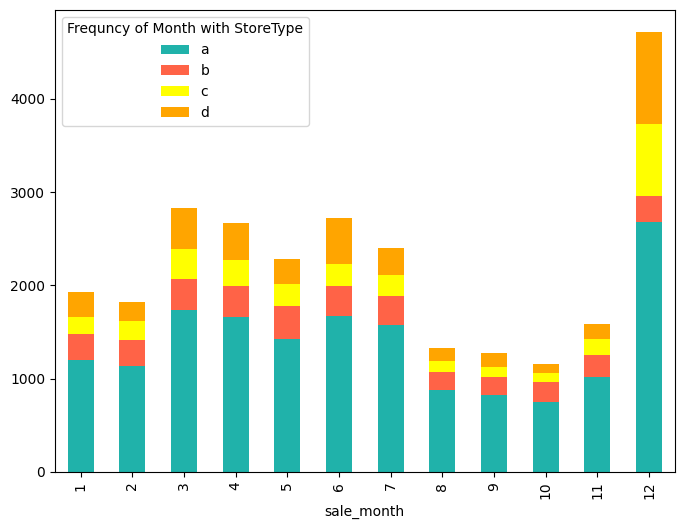

In [50]:
visual=outlier_sales.groupby(['sale_month','StoreType'])['sale_month'].count().reset_index(name='Frequency').sort_values(by='sale_month')
pivot=visual.pivot_table(index=['sale_month'],columns=['StoreType'],values=['Frequency'])

ax=pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato','yellow','orange'], figsize=(8,6))
plt.legend(title='Frequncy of Month with StoreType', loc='upper left', labels=['a', 'b','c','d'])
plt.show(ax)

In [51]:
for variable in ["CompetitionDistance","CompetitionOpenSinceYear"]:
  lower,upper=boundaries(retail_df,variable)
  retail_df[variable]=np.where(retail_df[variable]>upper,upper,np.where(retail_df[variable]<lower,lower,retail_df[variable]))

## Reasons for outlier Treatment:
**Sales outlier :**
Since the sales data has high sales during the months of December,march,April,June due toconsecutive promo,festive season and the sales are in store A with basic products . Hence the increse in sales cannot beremoved. The outlier values have reasonable amount of increase. Removing them will be effective while building a model.

**Customer Outlier**:

Since sales and cutomer are positively correlated the sales oulier values are due to increase in sales . The customer outlier is aslo not treated.

**Competition Distance and year**:These two variable the outliers are treated using IQR method.

##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR method is used to treat the outlier

### 3. Categorical Encoding

In [52]:



final_df = pd.get_dummies(retail_df, columns = ['DayOfWeek', 'StoreType', 'Assortment'])

final_df.head()


,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sale_year,sale_month,CompetitionDistance,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,2015-07-31,5263,555,1,1,0,1,2015,7,1270.0,...,1,0,0,0,0,1,0,1,0,0
1,2015-07-31,6064,625,1,1,0,1,2015,7,570.0,...,1,0,0,1,0,0,0,1,0,0
2,2015-07-31,8314,821,1,1,0,1,2015,7,14130.0,...,1,0,0,1,0,0,0,1,0,0
3,2015-07-31,13995,1498,1,1,0,1,2015,7,620.0,...,1,0,0,0,0,1,0,0,0,1
4,2015-07-31,4822,559,1,1,0,1,2015,7,16135.0,...,1,0,0,1,0,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding method is used

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features
final_df.head()

,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sale_year,sale_month,CompetitionDistance,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,2015-07-31,5263,555,1,1,0,1,2015,7,1270.0,...,1,0,0,0,0,1,0,1,0,0
1,2015-07-31,6064,625,1,1,0,1,2015,7,570.0,...,1,0,0,1,0,0,0,1,0,0
2,2015-07-31,8314,821,1,1,0,1,2015,7,14130.0,...,1,0,0,1,0,0,0,1,0,0
3,2015-07-31,13995,1498,1,1,0,1,2015,7,620.0,...,1,0,0,0,0,1,0,0,0,1
4,2015-07-31,4822,559,1,1,0,1,2015,7,16135.0,...,1,0,0,1,0,0,0,1,0,0


In [54]:
# calculting the total time period between the start of the competition store 
final_df['months_after-opening']=abs(final_df['sale_year']-final_df['CompetitionOpenSinceYear'])*12 + abs(final_df['sale_month']-final_df['CompetitionOpenSinceMonth'])
final_df['months_after-opening']=final_df['months_after-opening'].astype('int')

final_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

final_df.head()

,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sale_year,sale_month,CompetitionDistance,...,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,months_after-opening
0,2015-07-31,5263,555,1,1,0,1,2015,7,1270.0,...,0,0,0,0,1,0,1,0,0,86
1,2015-07-31,6064,625,1,1,0,1,2015,7,570.0,...,0,0,1,0,0,0,1,0,0,100
2,2015-07-31,8314,821,1,1,0,1,2015,7,14130.0,...,0,0,1,0,0,0,1,0,0,113
3,2015-07-31,13995,1498,1,1,0,1,2015,7,620.0,...,0,0,0,0,1,0,0,0,1,74
4,2015-07-31,4822,559,1,1,0,1,2015,7,16135.0,...,0,0,1,0,0,0,1,0,0,3


In [55]:
final_df['months_after_promo2']=abs(final_df['sale_year']-final_df['Promo2SinceYear'])*12+abs(final_df['sale_month']-(final_df['Promo2SinceWeek']*0.230137))

In [56]:
def promo2run(val):
  if val!=0:
    return 1;
  else:
    return 0


final_df['Promo2running']=final_df['PromoInterval'].apply(promo2run)

In [57]:
final_df.drop(columns=['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [58]:
final_df=final_df.loc[final_df['Open']==1]

In [75]:
final_df.drop(columns=['Date','Period'],axis=1,inplace=True)


In [60]:
final_df['months_after_promo2']=final_df['months_after_promo2'].astype('int')

<ipython-input-60-f7691e154303>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['months_after_promo2']=final_df['months_after_promo2'].astype('int')


In [79]:
final_df.drop(final_df[final_df['Sales'] == float("-inf")].index,inplace=True)

In [76]:
final_df.columns

Index(['Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'sale_year', 'sale_month', 'CompetitionDistance', 'Promo2',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'months_after-opening',
       'months_after_promo2', 'Promo2running'],
      dtype='object')

#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting
#Using lasso regularization for feature selection
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso


In [80]:
X=final_df.drop(columns=['Sales'],axis=1)
y=final_df['Sales']

In [84]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customers             844392 non-null  int64  
 1   Open                  844392 non-null  int64  
 2   Promo                 844392 non-null  int64  
 3   StateHoliday          844392 non-null  int64  
 4   SchoolHoliday         844392 non-null  int64  
 5   sale_year             844392 non-null  int64  
 6   sale_month            844392 non-null  int64  
 7   CompetitionDistance   844392 non-null  float64
 8   Promo2                844392 non-null  int64  
 9   DayOfWeek_1           844392 non-null  uint8  
 10  DayOfWeek_2           844392 non-null  uint8  
 11  DayOfWeek_3           844392 non-null  uint8  
 12  DayOfWeek_4           844392 non-null  uint8  
 13  DayOfWeek_5           844392 non-null  uint8  
 14  DayOfWeek_6           844392 non-null  uint8  
 15 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [88]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [89]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...........model__alpha=0.1;, score=-1597026.096 total time=   2.7s
[CV 2/5] END ...........model__alpha=0.1;, score=-1594702.508 total time=   2.6s
[CV 3/5] END ...........model__alpha=0.1;, score=-1601744.990 total time=   2.7s
[CV 4/5] END ...........model__alpha=0.1;, score=-1594467.866 total time=   2.8s
[CV 5/5] END ...........model__alpha=0.1;, score=-1590534.679 total time=   3.4s
[CV 1/5] END ...........model__alpha=0.2;, score=-1597041.097 total time=   3.8s
[CV 2/5] END ...........model__alpha=0.2;, score=-1594720.335 total time=   3.9s
[CV 3/5] END ...........model__alpha=0.2;, score=-1601765.204 total time=   4.3s
[CV 4/5] END ...........model__alpha=0.2;, score=-1594475.487 total time=   4.0s
[CV 5/5] END ...........model__alpha=0.2;, score=-1590544.952 total time=   4.5s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-1597043.104 total time=   2.5s
[CV 2/5] END model__alpha=0.30000000000000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [90]:
search.best_params_

{'model__alpha': 0.1}

In [91]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [92]:
importance = np.abs(coefficients)
importance

array([2964.98698788,    0.        ,  626.92022012,   10.88714995,
         45.34487908,  133.83588925,  109.32038513,  274.76029448,
        216.54542601,  171.67160859,    0.        ,   51.40261001,
         78.64724203,   25.5038651 ,  113.22288033,   24.26338107,
        298.60216762,  514.68273365,  245.84237391,  219.7443374 ,
         99.77090071,  427.23699436,   48.13414698,   20.52249671,
         62.07412407,    0.        ])

In [93]:
features=X.columns

In [94]:
np.array(features)[importance > 0]

array(['Customers', 'Promo', 'StateHoliday', 'SchoolHoliday', 'sale_year',
       'sale_month', 'CompetitionDistance', 'Promo2', 'DayOfWeek_1',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'months_after-opening', 'months_after_promo2'], dtype=object)

In [96]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

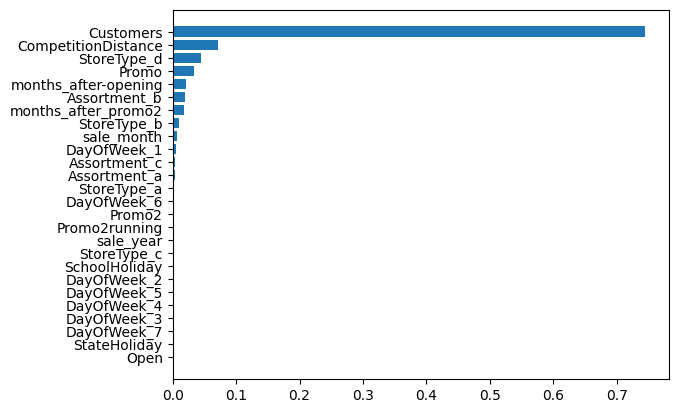

In [97]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [100]:
X.drop(columns=['Open','StateHoliday','SchoolHoliday','sale_year','Promo2', 'Promo2running'],axis=1,inplace=True)

In [101]:
final_df.drop(columns=['Open','StateHoliday','SchoolHoliday','sale_year','Promo2', 'Promo2running'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

Correlation -Filter 
Lasso and Random forest -Wrapper method.
When data has numerical tagret variable with many categorical varibles the randomforest works

##### Which all features you found important and why?

Baes on the above observations the impotant features are :Customers,Promo,months_after_promo2,StoreType,Assortment,sale_month,CompetitionDistance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [102]:
# Transform Your data
from sklearn.preprocessing import PowerTransformer
col_names = final_df.columns
features = final_df[col_names]

scaler =PowerTransformer(method = 'yeo-johnson').fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Sales,Customers,Promo,sale_month,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,...,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,months_after-opening,months_after_promo2
0,-0.467968,-0.479127,1.113726,0.448595,-0.423371,-0.441152,-0.453356,-0.449507,-0.435553,2.256222,...,-0.065371,-1.086332,-0.13703,2.544396,-0.664742,0.947575,-0.0991,-0.929248,0.966458,0.985284
1,-0.142258,-0.209752,1.113726,0.448595,-0.901340,-0.441152,-0.453356,-0.449507,-0.435553,2.256222,...,-0.065371,0.920529,-0.13703,-0.393021,-0.664742,0.947575,-0.0991,-0.929248,1.133373,-0.735568
2,0.609136,0.405221,1.113726,0.448595,1.436820,-0.441152,-0.453356,-0.449507,-0.435553,2.256222,...,-0.065371,0.920529,-0.13703,-0.393021,-0.664742,0.947575,-0.0991,-0.929248,1.273044,-0.793069
3,1.931151,1.743153,1.113726,0.448595,-0.853968,-0.441152,-0.453356,-0.449507,-0.435553,2.256222,...,-0.065371,-1.086332,-0.13703,2.544396,-0.664742,-1.055326,-0.0991,1.076139,0.805958,0.985284
4,-0.665672,-0.462815,1.113726,0.448595,1.561155,-0.441152,-0.453356,-0.449507,-0.435553,2.256222,...,-0.065371,0.920529,-0.13703,-0.393021,-0.664742,0.947575,-0.0991,-0.929248,-1.468303,0.985284


In [103]:
scaled_features[scaled_features['Sales'] == float("-inf")]
scaled_features[scaled_features['Customers'] == float("-inf")]

,Sales,Customers,Promo,sale_month,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,...,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,months_after-opening,months_after_promo2


# **Data Splitting**

In [106]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=scaled_features.drop(columns=['Sales'])
y=scaled_features['Sales']

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

##### What data splitting ratio have you used and why? 

20 and 80 ratio the test and train data are split

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
regressor.fit(X, y)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
# performing predictions on the test dataset
# y_pred = regressor.predict(X_test)
  
# # metrics are used to find accuracy or error
# from sklearn import metrics  
# print()
y_pred.reshape(-1, 1)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", regressor.score(y_test, y_pred))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(X_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 21))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Fit the Algorithm

# Predict on the model
# final model
from sklearn.metrics import r2_score
n_features_optimal = 10

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = lm.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***